# Advanced Analyses/Plotting

In `process.py` (or `SqueakIntro.ipynb`), we've parsed the raw data,
and generated a number of data files: `processed.csv`, which contains
the summary statistics, and `nx.csv`, `ny.csv`, `rx.csv`, and
`rx.csv`, which contain the actual processed mouse trajectories.

In this notebook, I've collected some snippets of python code which
I've found useful in performing more complex analyses myself,
including plotting the time course of the mouse trajectory data.

I'm not going to describe most of the code here - what it does should
be evident from its output - and so this section probaly requires at
least some knowledge about programming in python, or at least
willingness to learn. I hope this proves helpful!

I will try to update this file as over time. If you have any snippets
of your own, feel free to share them!


In [1]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('darkgrid')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [2]:
data = pd.read_csv('processed.csv')
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

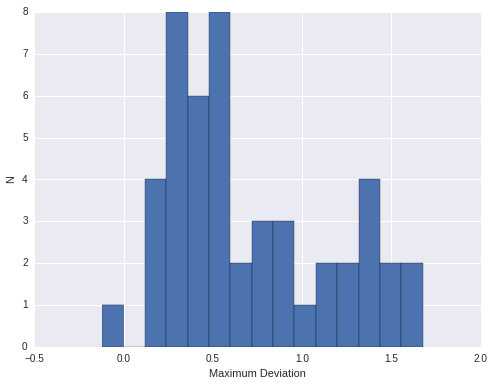

In [3]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

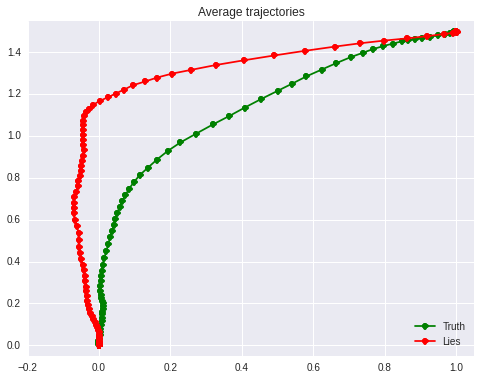

In [4]:
# Plot average trajectories by condition
truth_indices = data[data.condition=='truth'].index
lie_indices = data[data.condition=='lie'].index

truthX = nx.iloc[truth_indices].mean() # .iloc selects by row indices
truthY = ny.iloc[truth_indices].mean()
lieX = nx.iloc[lie_indices].mean()
lieY = ny.iloc[lie_indices].mean()


plt.plot(truthX, truthY, '-o', color='green', label='Truth')
plt.plot(lieX, lieY, '-o', color='red', label='Lies')
plt.legend(loc="lower right")
plt.title("Average trajectories")
plt.xlim((-.2, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

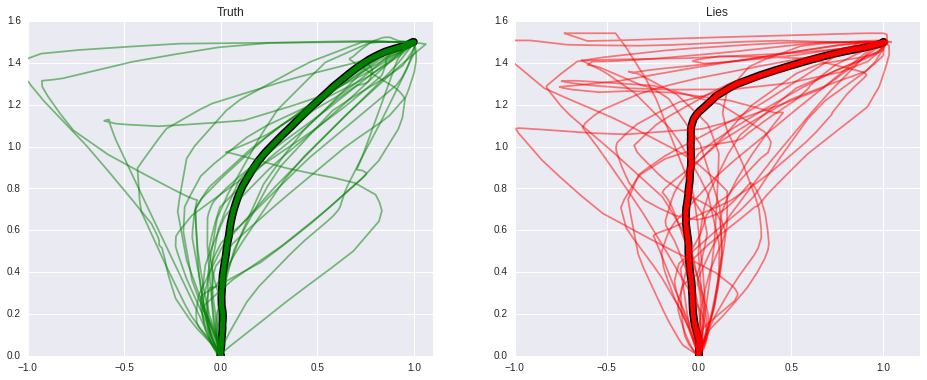

In [5]:
plt.figure(figsize=((16,6)))
plt.subplot(121)
# Plot line in black slightly larger first, to get an outline
plt.plot(truthX, truthY, linewidth=8, color='black')
plt.plot(truthX, truthY, linewidth=5, color='green', label='Truth')
for i in truth_indices:
    plt.plot(nx.iloc[i], ny.iloc[i], 'green', alpha=.5)
plt.xlim((-1, 1.1))
plt.ylim((0, 1.6))
plt.title("Truth")

plt.subplot(122)
# Plot line in black slightly larger first, to get an outline
plt.plot(lieX, lieY, linewidth=8, color='black')
plt.plot(lieX, lieY, linewidth=5, color='red', label='Lies')
for i in lie_indices:
    plt.plot(nx.iloc[i], ny.iloc[i], 'red', alpha=.5)
plt.xlim((-1, 1.2))
plt.ylim((0, 1.6))
plt.title("Lies")
    
plt.show()

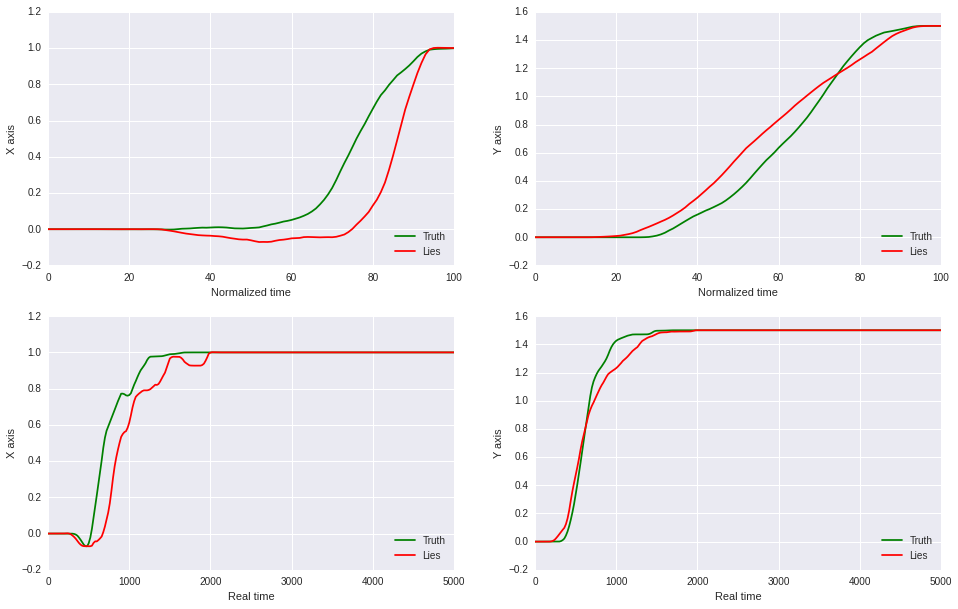

In [6]:
plt.figure(figsize=(16,10))
variables = [nx, ny, rx, ry]
labels_x = np.repeat(['Normalized time', 'Real time'], 2)
labels_y = np.tile(["X axis", "Y axis"], 2)

truth_indices = data[data.condition=='truth'].index
lie_indices = data[data.condition=='lie'].index

for i in range(4):
    plt.subplot(2, 2, i+1)
    v = variables[i] # Our dependant variable
    truthV = v.iloc[truth_indices].mean()
    lieV = v.iloc[lie_indices].mean()
    ind = truthV.index.values # The appropriate scale for the x axis
    plt.plot(ind, truthV, 'green', label='Truth')
    plt.plot(ind, lieV, 'red', label='Lies')
    plt.xlabel(labels_x[i])
    plt.ylabel(labels_y[i])
    plt.legend(loc="lower right")
plt.show()
    

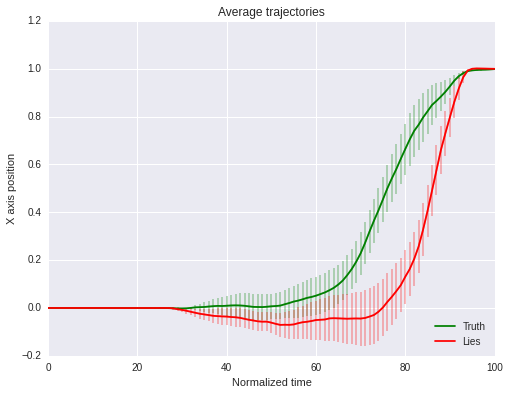

In [7]:
truth_indices = data[data.condition=='truth'].index
lie_indices = data[data.condition=='lie'].index

truthX = nx.iloc[truth_indices].mean()
lieX = nx.iloc[lie_indices].mean()

# Standard Error = st dev / sqrt(N)
truthSEM = nx.iloc[truth_indices].std() / np.sqrt(len(truth_indices))
lieSEM = nx.iloc[lie_indices].std() / np.sqrt(len(lie_indices))

plt.plot(truthX, color='green', label='Truth')
plt.errorbar(range(101), truthX, yerr=truthSEM,
            color='green', alpha=.3)
plt.plot(lieX, 'red', label='Lies')
plt.errorbar(range(101), lieX, yerr=lieSEM,
            color='red', alpha=.3)
plt.legend(loc="lower right")
plt.ylabel("X axis position")
plt.xlabel("Normalized time")
plt.title("Average trajectories")
plt.show()

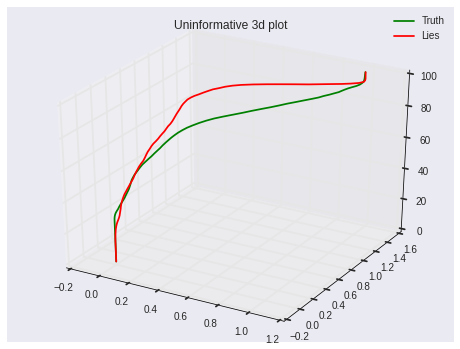

In [8]:
truth_indices = data[data.condition=='truth'].index
lie_indices = data[data.condition=='lie'].index

truthX = nx.iloc[truth_indices].mean() # .iloc selects by row indices
truthY = ny.iloc[truth_indices].mean()

lieX = nx.iloc[lie_indices].mean()
lieY = ny.iloc[lie_indices].mean()
T = nx.columns.astype(float)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(truthX, truthY, T, 'green', label='Truth')
ax.plot(lieX, lieY, T, 'red', label='Lies')
plt.legend()
plt.title("Uninformative 3d plot")
plt.show()